## K-Nearest Neighbors Analysis
Using financial ticker for JPMorgan to create the trading strategy, using KNN classifier.



###  Extracted data for the ticker from Yahoo Finance. Made brief exploratory analysis of obtained data.

In [1]:
! pip install fix-yahoo-finance==0.1.30
import fix_yahoo_finance as yf

In [39]:
ticker = 'JPM' 
JP_Morgan_df = yf.Ticker(ticker)

In [40]:
# Upload data for one ticker (for the recent year) from Yahoo Finance.
JP_Morgan_df = JP_Morgan_df.history(period="1y", interval='1d')
JP_Morgan_df = JP_Morgan_df.dropna()

In [41]:
JP_Morgan_df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-12-12,129.78,133.62,129.51,133.18,13717400,0.0,0
2019-12-13,133.12,133.97,131.45,132.02,10592100,0.0,0
2019-12-16,133.53,133.97,132.51,132.53,11372000,0.0,0
2019-12-17,132.90,133.81,132.42,133.34,11546800,0.0,0
2019-12-18,133.31,134.15,132.89,133.20,10381500,0.0,0


In [42]:
JP_Morgan_df.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-12-07,121.15,122.17,120.21,121.88,9724300,0.0,0
2020-12-08,121.04,122.33,120.76,122.00,9592100,0.0,0
2020-12-09,123.17,123.30,120.44,121.05,13073900,0.0,0
2020-12-10,119.99,120.78,119.56,120.27,13668400,0.0,0
2020-12-11,118.94,120.02,118.37,119.56,9981200,0.0,0


In [43]:
JP_Morgan_df.isnull().sum()

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

In [44]:
JP_Morgan_df.isna().sum()

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

In [45]:
JP_Morgan_df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000,253.0
mean,105.570316,107.029526,104.081542,105.499605,1.911498e+07,0.014229,0.0
std,16.077243,15.734283,16.395234,16.118352,9.332186e+06,0.112489,0.0
min,79.210000,81.330000,74.690000,76.750000,3.324300e+06,0.000000,0.0
25%,94.190000,95.950000,92.540000,94.430000,1.274350e+07,0.000000,0.0
50%,99.390000,100.990000,98.130000,99.330000,1.629340e+07,0.000000,0.0
75%,119.360000,120.720000,117.800000,118.010000,2.368300e+07,0.000000,0.0
max,135.000000,136.700000,134.380000,136.150000,4.972520e+07,0.900000,0.0


In [46]:
JP_Morgan_df[JP_Morgan_df.Dividends != 0]

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-01-03,133.53,135.21,133.13,134.35,10386800,0.9,0
2020-04-03,84.39,85.84,81.22,82.47,21199400,0.9,0
2020-07-02,93.87,94.09,91.08,91.81,27845600,0.9,0
2020-10-05,98.32,99.25,97.53,99.04,13871900,0.9,0


we can see that the company pays dividends quarterly which is natural for american companies. Moreover, during this year the amount the dividents didn't rise

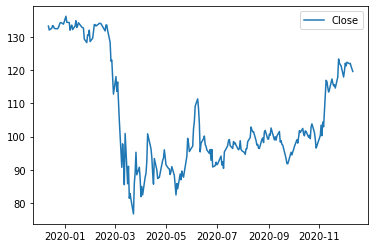

In [47]:
plt.plot(JP_Morgan_df.Close, label='Close')
plt.legend()
plt.show()

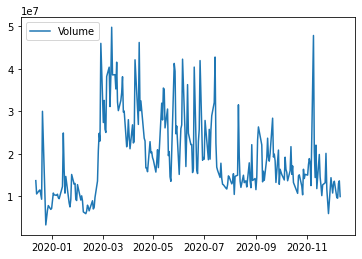

In [48]:
plt.plot(JP_Morgan_df.Volume, label='Volume')
plt.legend()
plt.show()

The volumne flucutates significantly during the year. But the "March peak" is clearly visible

###  Applying KNN classifier to obtained data

In [49]:
# Target variable
classification_label = np.where(JP_Morgan_df.Close.shift(-1) > JP_Morgan_df.Close, 1, -1)
classification_df = JP_Morgan_df.drop(['Close'], axis=1)

In [50]:
# Splitting the dataset according to the timeline
split_percentage = 0.7
split = int(split_percentage*len(JP_Morgan_df))

classification_df_train = classification_df[:split]
classification_label_train = classification_label[:split]

classification_df_test = classification_df[split:]
classification_label_test = classification_label[split:]

In [51]:
print('classification_df_train rows', classification_df_train.shape[0])
print("classification_label_train rows", classification_label_train.shape[0])

classification_df_train rows 177
classification_label_train rows 177


In [52]:
print('classification_df_test rows', classification_df_test.shape[0])
print("classification_label_test rows", classification_label_test.shape[0])

classification_df_test rows 76
classification_label_test rows 76


In [53]:
from sklearn.neighbors import KNeighborsClassifier

# Instantiate KNN learning model(k=15)
knn_clf = KNeighborsClassifier(n_neighbors=15)

# fit the model
knn_clf.fit(classification_df_train, classification_label_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform')

In [54]:
from sklearn.metrics import accuracy_score

# Accuracy Score
accuracy_train = accuracy_score(classification_label_train, knn_clf.predict(classification_df_train))
accuracy_test = accuracy_score(classification_label_test, knn_clf.predict(classification_df_test))

print ('Train_data Accuracy: %.2f' %accuracy_train)
print ('Test_data Accuracy: %.2f' %accuracy_test)

Train_data Accuracy: 0.60
Test_data Accuracy: 0.61


The accuracy scores look great

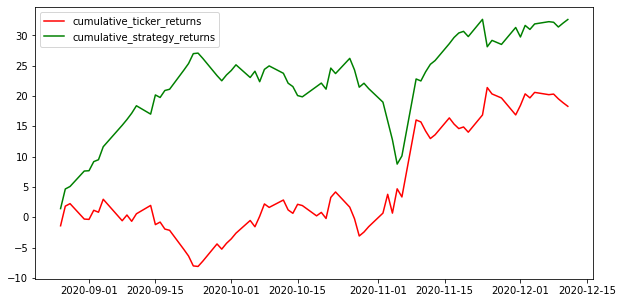

In [55]:
# Predicted Signal
JP_Morgan_df['Predicted_Signal'] = knn_clf.predict(classification_df)

JP_Morgan_df['ticker_returns'] = np.log(JP_Morgan_df.Close / JP_Morgan_df.Close.shift(1))
cumulative_ticker_returns = JP_Morgan_df[split:]['ticker_returns'].cumsum() * 100

JP_Morgan_df['strategy_returns'] = JP_Morgan_df['ticker_returns'] * JP_Morgan_df['Predicted_Signal'].shift(1)
cumulative_strategy_returns = JP_Morgan_df[split:]['strategy_returns'].cumsum() * 100

plt.figure(figsize=(10, 5))
plt.plot(cumulative_ticker_returns, color='r', label='cumulative_ticker_returns')
plt.plot(cumulative_strategy_returns, color='g', label='cumulative_strategy_returns')
plt.legend()
plt.show()

On the line graph above we see that if you buy a JPMorgan Chase & Co. shares in September 2020 and keep them till nowadays, you will have about 18% of cumularive returns. But if you follow the strategy trained with KNN, you may obtain more than 30% cumulative return

## Decision Trees Analysis



### Uploaded data for one ticker from Quandl. Made brief exploratory analysis of obtained data.

In [2]:
! pip install Quandl

import quandl

In [57]:
# import quandl

quandl.ApiConfig.api_key = 'RiZ6tPxvRSRTckkVBYhx'
JP_Morgan_df = quandl.get("EOD/JPM")
JP_Morgan_df.head()

,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
Date,,,,,,,,,,,,
2013-09-03,51.25,51.72,50.83,51.13,15277200.0,0.0,1.0,41.912759,42.297130,41.569279,41.814622,15277200.0
2013-09-04,51.16,52.10,50.93,51.87,19923800.0,0.0,1.0,41.839156,42.607898,41.651060,42.419801,19923800.0
2013-09-05,52.03,52.52,51.91,52.11,13913200.0,0.0,1.0,42.550651,42.951378,42.452514,42.616076,13913200.0
2013-09-06,52.41,52.71,51.28,52.56,22339900.0,0.0,1.0,42.861419,43.106762,41.937293,42.984090,22339900.0
2013-09-09,52.78,53.19,52.52,52.86,19936400.0,0.0,1.0,43.164008,43.499310,42.951378,43.229433,19936400.0


In [58]:
JP_Morgan_df.tail(10)

,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
Date,,,,,,,,,,,,
2017-12-14,106.015,106.4500,104.6400,104.66,13033082.0,0.0,1.0,96.980115,97.378043,95.722296,95.740591,13033082.0
2017-12-15,105.720,106.5200,105.2000,106.14,29350126.0,0.0,1.0,96.710255,97.442077,96.234571,97.094462,29350126.0
2017-12-18,107.310,107.6300,106.4800,106.96,12712623.0,0.0,1.0,98.164751,98.457480,97.405486,97.844579,12712623.0
2017-12-19,107.290,107.4900,106.4400,106.51,12149719.0,0.0,1.0,98.146456,98.329411,97.368895,97.432929,12149719.0
2017-12-20,107.610,107.7305,106.0900,106.14,13089983.0,0.0,1.0,98.439184,98.549415,97.048723,97.094462,13089983.0
2017-12-21,106.630,108.0700,106.5600,107.83,12322897.0,0.0,1.0,97.542703,98.859982,97.478668,98.640435,12322897.0
2017-12-22,108.130,108.4600,106.8050,107.45,14571635.0,0.0,1.0,98.914869,99.216745,97.702789,98.292820,14571635.0
2017-12-26,107.200,107.9900,106.4000,107.02,7403739.0,0.0,1.0,98.064126,98.786800,97.332304,97.899466,7403739.0
2017-12-27,106.670,107.2900,106.6700,107.22,9496548.0,0.0,1.0,97.579294,98.146456,97.579294,98.082421,9496548.0


here we have more columns than from the yahoo lib. the adjusted columns appeared

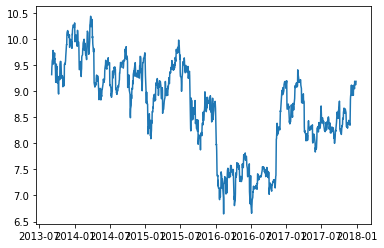

In [59]:
plt.plot(JP_Morgan_df.Close - JP_Morgan_df.Adj_Close)

We can see that the adjustment is not stable

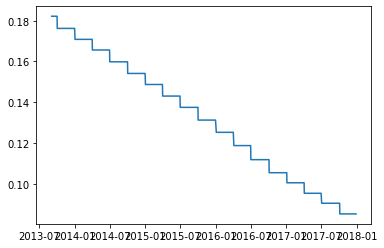

In [60]:
plt.plot((JP_Morgan_df.Close - JP_Morgan_df.Adj_Close)/JP_Morgan_df.Close)

Also it is not constant with an amendment to the share price

Let us create the predictors according to the example from the link above

In [5]:
!pip install ./TA_Lib-0.4.19-cp38-cp38-win_amd64.whl

ERROR: TA_Lib-0.4.19-cp38-cp38-win_amd64.whl is not a supported wheel on this platform.


In [62]:
import talib as ta
JP_Morgan_df['EMA10'] = ta.EMA(JP_Morgan_df['Close'].values, timeperiod=10)
JP_Morgan_df['EMA30'] = ta.EMA(JP_Morgan_df['Close'].values, timeperiod=30)
JP_Morgan_df['ATR'] = ta.ATR(JP_Morgan_df['High'].values, JP_Morgan_df['Low'].values, JP_Morgan_df['Close'].values, timeperiod=14)
JP_Morgan_df['ADX'] = ta.ADX(JP_Morgan_df['High'].values, JP_Morgan_df['Low'].values, JP_Morgan_df['Close'].values, timeperiod=14)
JP_Morgan_df['RSI'] = ta.RSI(JP_Morgan_df['Close'].values, timeperiod=14)
macd, macdsignal, macdhist = ta.MACD(JP_Morgan_df['Close'].values, fastperiod=12, slowperiod=26, signalperiod=9)
JP_Morgan_df['MACD'] = macd
JP_Morgan_df['MACDsignal'] = macdsignal
JP_Morgan_df.tail()

,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume,EMA10,EMA30,ATR,ADX,RSI,MACD,MACDsignal
Date,,,,,,,,,,,,,,,,,,,
2017-12-21,106.63,108.07,106.5600,107.83,12322897.0,0.0,1.0,97.542703,98.859982,97.478668,98.640435,12322897.0,106.106739,103.562698,1.715884,22.762933,66.307517,1.821963,1.791414
2017-12-22,108.13,108.46,106.8050,107.45,14571635.0,0.0,1.0,98.914869,99.216745,97.702789,98.292820,14571635.0,106.350968,103.813492,1.711535,23.030127,64.281895,1.815918,1.796315
2017-12-26,107.20,107.99,106.4000,107.02,7403739.0,0.0,1.0,98.064126,98.786800,97.332304,97.899466,7403739.0,106.472611,104.020363,1.702854,22.922306,61.974724,1.756185,1.788289
2017-12-27,106.67,107.29,106.6700,107.22,9496548.0,0.0,1.0,97.579294,98.146456,97.579294,98.082421,9496548.0,106.608500,104.226791,1.625507,22.822186,62.646263,1.705327,1.771696
2017-12-28,107.40,107.84,107.1601,107.79,7438655.0,0.0,1.0,98.247081,98.649583,98.027626,98.603844,7438655.0,106.823318,104.456676,1.557964,23.056674,64.566868,1.691517,1.755660


In [63]:
import numpy as np
JP_Morgan_df['ClgtEMA10'] = np.where(JP_Morgan_df['Close'] > JP_Morgan_df['EMA10'], 1, -1)
JP_Morgan_df['EMA10gtEMA30'] = np.where(JP_Morgan_df['EMA10'] > JP_Morgan_df['EMA30'], 1, -1)
JP_Morgan_df['MACDSIGgtMACD'] = np.where(JP_Morgan_df['MACDsignal'] > JP_Morgan_df['MACD'], 1, -1)
JP_Morgan_df.tail()

,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,...,EMA10,EMA30,ATR,ADX,RSI,MACD,MACDsignal,ClgtEMA10,EMA10gtEMA30,MACDSIGgtMACD
Date,,,,,,,,,,,,,,,,,,,,,
2017-12-21,106.63,108.07,106.5600,107.83,12322897.0,0.0,1.0,97.542703,98.859982,97.478668,...,106.106739,103.562698,1.715884,22.762933,66.307517,1.821963,1.791414,1,1,-1
2017-12-22,108.13,108.46,106.8050,107.45,14571635.0,0.0,1.0,98.914869,99.216745,97.702789,...,106.350968,103.813492,1.711535,23.030127,64.281895,1.815918,1.796315,1,1,-1
2017-12-26,107.20,107.99,106.4000,107.02,7403739.0,0.0,1.0,98.064126,98.786800,97.332304,...,106.472611,104.020363,1.702854,22.922306,61.974724,1.756185,1.788289,1,1,1
2017-12-27,106.67,107.29,106.6700,107.22,9496548.0,0.0,1.0,97.579294,98.146456,97.579294,...,106.608500,104.226791,1.625507,22.822186,62.646263,1.705327,1.771696,1,1,1
2017-12-28,107.40,107.84,107.1601,107.79,7438655.0,0.0,1.0,98.247081,98.649583,98.027626,...,106.823318,104.456676,1.557964,23.056674,64.566868,1.691517,1.755660,1,1,1


Create target variable and try to solve a regression task

In [64]:
JP_Morgan_df['Return'] = JP_Morgan_df['Close'].pct_change(1).shift(-1)
JP_Morgan_df['target_rgs'] = JP_Morgan_df['Return']
JP_Morgan_df.tail()

,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,...,ATR,ADX,RSI,MACD,MACDsignal,ClgtEMA10,EMA10gtEMA30,MACDSIGgtMACD,Return,target_rgs
Date,,,,,,,,,,,,,,,,,,,,,
2017-12-21,106.63,108.07,106.5600,107.83,12322897.0,0.0,1.0,97.542703,98.859982,97.478668,...,1.715884,22.762933,66.307517,1.821963,1.791414,1,1,-1,-0.003524,-0.003524
2017-12-22,108.13,108.46,106.8050,107.45,14571635.0,0.0,1.0,98.914869,99.216745,97.702789,...,1.711535,23.030127,64.281895,1.815918,1.796315,1,1,-1,-0.004002,-0.004002
2017-12-26,107.20,107.99,106.4000,107.02,7403739.0,0.0,1.0,98.064126,98.786800,97.332304,...,1.702854,22.922306,61.974724,1.756185,1.788289,1,1,1,0.001869,0.001869
2017-12-27,106.67,107.29,106.6700,107.22,9496548.0,0.0,1.0,97.579294,98.146456,97.579294,...,1.625507,22.822186,62.646263,1.705327,1.771696,1,1,1,0.005316,0.005316
2017-12-28,107.40,107.84,107.1601,107.79,7438655.0,0.0,1.0,98.247081,98.649583,98.027626,...,1.557964,23.056674,64.566868,1.691517,1.755660,1,1,1,NaN,NaN


### Applying Decision Tree to obtained data

In [65]:
JP_Morgan_df.fillna(0, inplace=True)

In [66]:
predictors_list = ['ATR', 'ADX','RSI', 'ClgtEMA10', 'EMA10gtEMA30', 'MACDSIGgtMACD']
X = JP_Morgan_df[predictors_list]
X.tail()

,ATR,ADX,RSI,ClgtEMA10,EMA10gtEMA30,MACDSIGgtMACD
Date,,,,,,
2017-12-21,1.715884,22.762933,66.307517,1,1,-1
2017-12-22,1.711535,23.030127,64.281895,1,1,-1
2017-12-26,1.702854,22.922306,61.974724,1,1,1
2017-12-27,1.625507,22.822186,62.646263,1,1,1
2017-12-28,1.557964,23.056674,64.566868,1,1,1


In [67]:
y_rgs = JP_Morgan_df.target_rgs
y_rgs.tail()

Date
2017-12-21   -0.003524
2017-12-22   -0.004002
2017-12-26    0.001869
2017-12-27    0.005316
2017-12-28    0.000000
Name: target_rgs, dtype: float64

In [68]:
y_rgs.fillna(0, inplace=True)

In [69]:
train_length = int(len(JP_Morgan_df)*0.70)
X_rgs_train = X[:train_length]
X_rgs_test = X[train_length:]
y_rgs_train = y_rgs[:train_length]
y_rgs_test = y_rgs[train_length:]

print (X_rgs_train.shape, y_rgs_train.shape)
print (X_rgs_test.shape, y_rgs_test.shape)

(763, 6) (763,)
(327, 6) (327,)


In [70]:
from sklearn.tree import DecisionTreeRegressor
regression_model = DecisionTreeRegressor()

# fit the model
regression_model.fit(X_rgs_train, y_rgs_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

because "continuous is not supported" for accuracy, let's calculate another error from sklearn

In [71]:
from sklearn.metrics import mean_absolute_error

In [72]:
# Accuracy Score
accuracy_train = mean_absolute_error(y_rgs_train, regression_model.predict(X_rgs_train)) * 100
accuracy_test = mean_absolute_error(y_rgs_test, regression_model.predict(X_rgs_test)) * 100

print ('Train_data Accuracy: %.2f' %accuracy_train)
print ('Test_data Accuracy: %.2f' %accuracy_test)

Train_data Accuracy: 0.02
Test_data Accuracy: 1.52


In [73]:
regression_model_pred = regression_model.predict(X_rgs_test)

In [74]:
y_rgs_test.head(10)

Date
2016-09-13   -0.001954
2016-09-14    0.003614
2016-09-15   -0.012305
2016-09-16    0.005621
2016-09-19    0.004079
2016-09-20    0.005718
2016-09-21    0.008229
2016-09-22   -0.002077
2016-09-23   -0.021859
2016-09-26    0.008817
Name: target_rgs, dtype: float64

In [75]:
regression_model_pred[:10]

array([-0.00535975,  0.00428036, -0.00248624,  0.02727925,  0.02727925,
       -0.00199005, -0.00792079,  0.00273806,  0.0061237 ,  0.02727925])

We see that the train error is several times lower than the test one. But the predictions are not as bad as expected. The model guesses the direction often enough but fails with the slace of this direction.

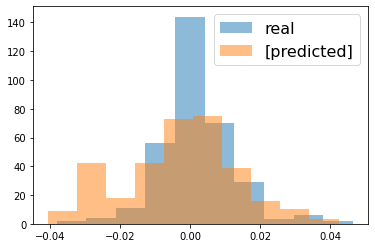

In [76]:
plt.hist(y_rgs_test, alpha=0.5, label='real')
plt.hist(regression_model_pred, alpha=0.5, label='[predicted]')
plt.legend(fontsize=16)

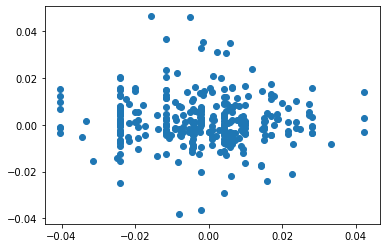

In [77]:
plt.scatter(regression_model_pred, y_rgs_test)

The strategy may be defined as following: if the model predicts the price rising for the next day - buy today. If the price is goind to fall according to the model - sell and short today. 